# Processing Data
## L√†m s·∫°ch d·ªØ li·ªáu

In [662]:
import pandas as pd
df = pd.read_csv('Tiki_Comments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55951 entries, 0 to 55950
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             55951 non-null  int64 
 1   title          55951 non-null  object
 2   content        23882 non-null  object
 3   thank_count    55951 non-null  int64 
 4   customer_id    55951 non-null  int64 
 5   rating         55951 non-null  int64 
 6   customer_name  55884 non-null  object
 7   created_at     55951 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.4+ MB


In [664]:
!pip install deep-translator


## Lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt v√† x·ª≠ l√Ω gi√° tr·ªã null, duplicates

In [666]:
# Xo√° d·ªØ li·ªáu tr√πng l·∫∑p theo customer_id + content (n·∫øu c√≥)
subset_cols = [col for col in ['customer_id', 'content'] if col in df.columns]
df = df.drop_duplicates(subset=subset_cols, keep='first')
# Xo√° c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt (an to√†n, kh√¥ng l·ªói n·∫øu c·ªôt kh√¥ng t·ªìn t·∫°i)
df = df.drop(columns=['id', 'thank_count', 'customer_name', 'customer_id', 'created_at'], errors='ignore')
# Xo√° nh·ªØng d√≤ng b·ªã thi·∫øu ·ªü c·ªôt 'content'
if 'content' in df.columns:
    df = df.dropna(subset=['content'])
# Ki·ªÉm tra l·∫°i
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23385 entries, 0 to 55950
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23385 non-null  object
 1   content  23385 non-null  object
 2   rating   23385 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 730.8+ KB


## Load c√°c danh s√°ch emoji, stopword, t·ª´ vi·∫øt t·∫Øt ƒë·ªÉ chu·∫©n b·ªã clean data


In [668]:
import re

#Danh s√°ch emoji c·∫ßn x√≥a
emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # M·∫∑t c∆∞·ªùi, c·∫£m x√∫c
        u"\U0001F300-\U0001F5FF"  # Bi·ªÉu t∆∞·ª£ng thi√™n nhi√™n, ƒë·ªëi t∆∞·ª£ng
        u"\U0001F680-\U0001F6FF"  # Bi·ªÉu t∆∞·ª£ng giao th√¥ng
        u"\U0001F1E0-\U0001F1FF"  # C·ªù qu·ªëc gia
        u"\U00002702-\U000027B0"  # K√Ω hi·ªáu d·∫°ng h√¨nh
        u"\U000024C2-\U0001F251"  # K√Ω hi·ªáu ƒë√≥ng khung
        u"\U0001F926-\U0001F937"  # H√†nh ƒë·ªông, c·ª≠ ch·ªâ
        u"\U00010000-\U0010FFFF" # C√°c k√Ω t·ª± b·ªï sung
        u"\u200d"                 # N·ªëi k√Ω t·ª± (zero width joiner)
        u"\u2640-\u2642"          # K√Ω hi·ªáu gi·ªõi t√≠nh
        u"\u2600-\u2B55"          # Bi·ªÉu t∆∞·ª£ng ƒëa d·∫°ng kh√°c
        u"\u23cf"                 # Bi·ªÉu t∆∞·ª£ng ƒë·∫©y ƒëƒ©a
        u"\u23e9"                 # Tua nhanh
        u"\u231a"                 # ƒê·ªìng h·ªì
        u"\u3030"                 # D·∫•u ngo·∫±n ngo√®o
        u"\ufe0f"                 # B·ªô ch·ªçn ki·ªÉu hi·ªÉn th·ªã
        "]+", flags=re.UNICODE
)
#Load danh s√°ch c√°c stop word
vietnamese_stopwords = set(open('vietnamese-stopwords.txt', encoding='utf-8').read().splitlines())

#Load danh s√°ch c√°c t·ª´ vi·∫øt t·∫Øt hay s·ª≠ d·ª•ng
short_word_dict = {
    "ko": "kh√¥ng",
    "kg": "kh√¥ng",
    "khong": "kh√¥ng",
    "k": "kh√¥ng",
    "kh": "kh√¥ng",
    "h√¥ng": "kh√¥ng",
    "cx": "c≈©ng",
    "mik": "m√¨nh",
    "mn": "m·ªçi ng∆∞·ªùi",
    "bth": "b√¨nh th∆∞·ªùng",
    "nv": "nh√¢n vi√™n",
    "sp": "s·∫£n ph·∫©m",
    "ƒëc": "ƒë∆∞·ª£c",
    "dc": "ƒë∆∞·ª£c",
    "ƒëk": "ƒëi·ªÅu kho·∫£n",
    "ƒëk": "ƒëi·ªÅu khi·ªán",
    "ƒët": "ƒëi·ªán tho·∫°i",
    "j": "g√¨",
    "vs": "v·ªõi",
    "hok": "kh√¥ng",
    "lun": "lu√¥n",
    "z": "v·∫≠y",
    "z·∫≠y": "g√¨ v·∫≠y",
    "thik": "th√≠ch",
    "hum": "h√¥m",
    "wa": "qua",
    "m": "m√¨nh",
    "mk": "m√¨nh",
    "bn": "b·∫°n",
    "ok": "·ªïn",
    "nx": "n·ªØa",
    "oke": "t·ªët",
    "oki": "t·ªët",
    "xs": "xu·∫•t s·∫Øc",
    "cs": "c√≥",
    "th": "th√¥i",
    "bk": "bi·∫øt",
    "tr": "tr·ªùi",
    "ns": "n√≥i",
    "h": "gi·ªù",
    "ms": "m·ªõi",
    "r": "r·ªìi",
    "s": "sao",
    "t": "t√¥i",
    "vde": "v·∫•n ƒë·ªÅ",
    "dui": "vui",
    "dth": "d·ªÖ th∆∞∆°ng"
}



In [670]:
!pip install maturin


In [672]:
!{sys.executable} -m pip install --upgrade pip setuptools wheel maturin
!{sys.executable} -m pip install underthesea


In [674]:
pip install underthesea==6.5.0


Note: you may need to restart the kernel to use updated packages.


In [676]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


## Ph√¢n t√≠ch ƒë·ªô ph·ªï bi·∫øn c·ªßa c√°c stopwords trong ti·∫øng Vi·ªát

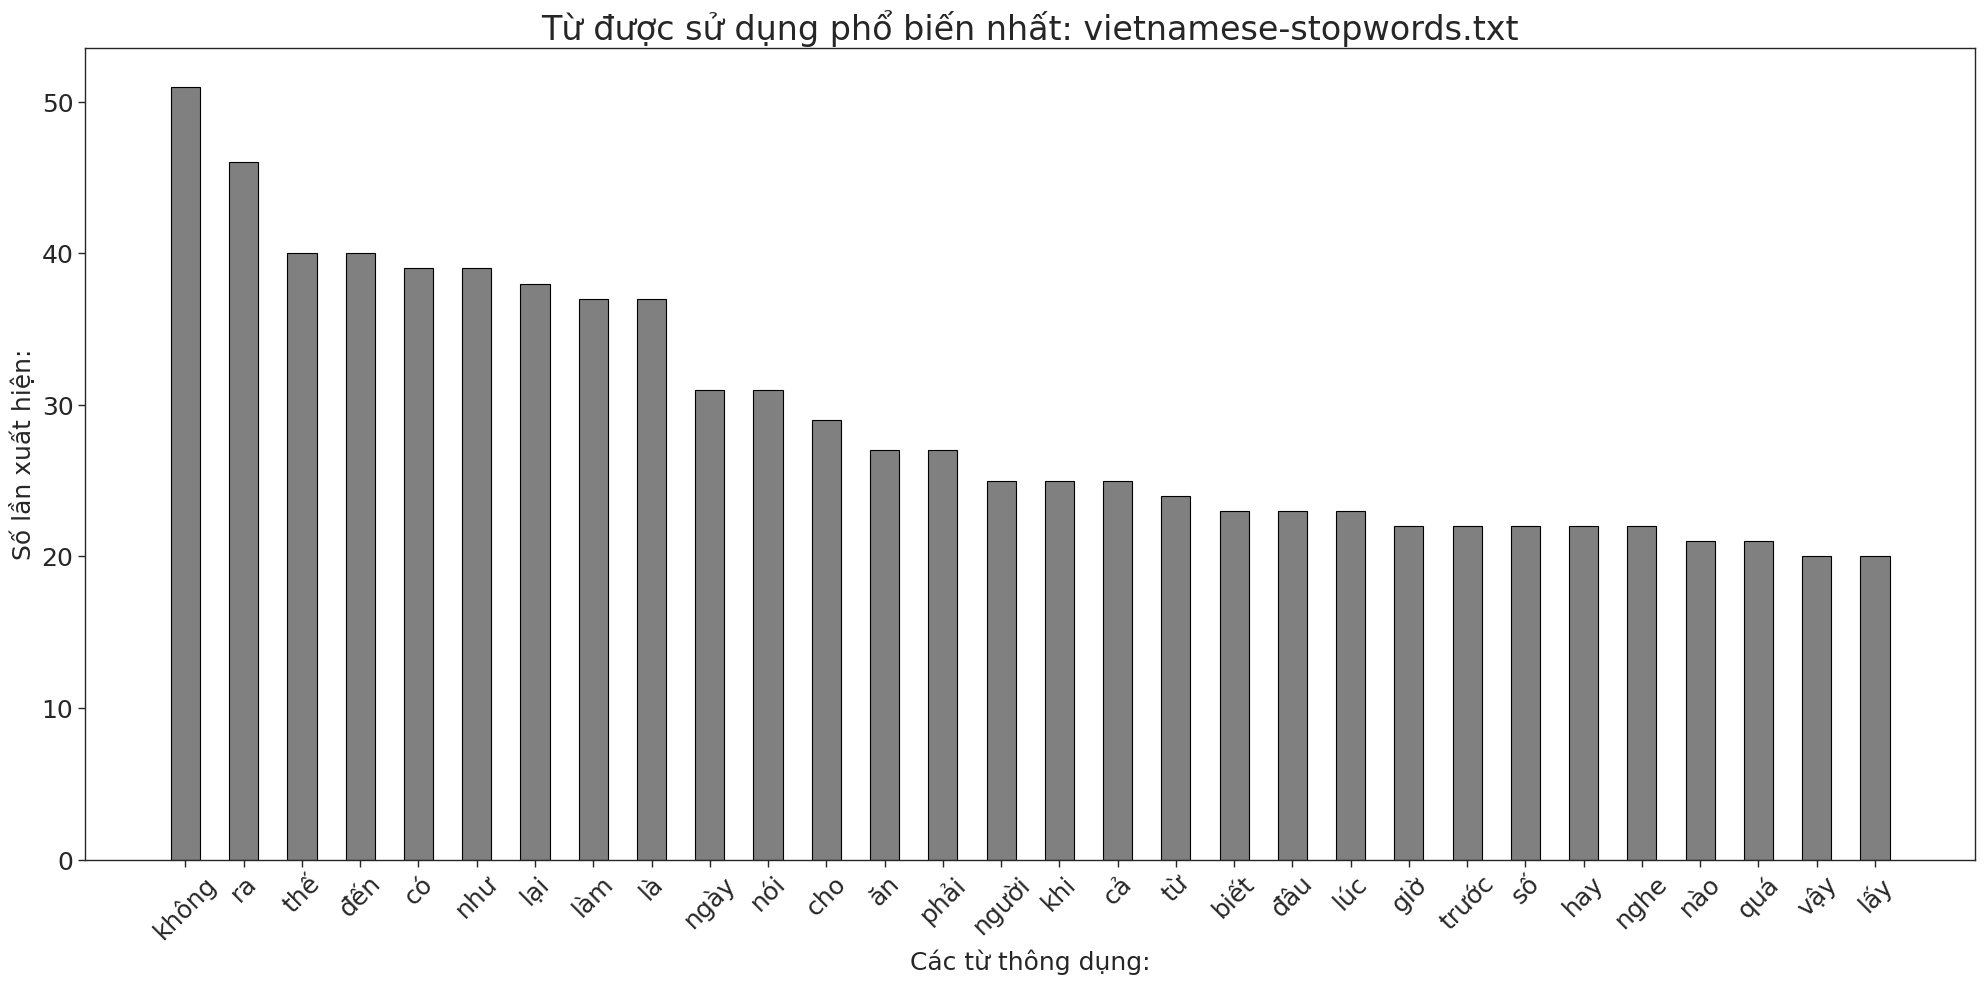

In [678]:
import matplotlib.pyplot as plt
from collections import Counter

def plotWordFrequency(vietnamese_file):
    # ƒê·ªçc file stopword
    with open(vietnamese_file, 'r', encoding='utf-8') as f:
        words = f.read().split()
    
    # ƒê·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán, l·∫•y 40 t·ª´ ph·ªï bi·∫øn nh·∫•t
    counter = Counter(words)
    data = counter.most_common(30)

    most_words = [x[0] for x in data]
    times_used = [x[1] for x in data]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(20, 10))
    plt.bar(most_words, times_used, color='grey', edgecolor='black', width=0.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('C√°c t·ª´ th√¥ng d·ª•ng:', fontsize=18)
    plt.ylabel('S·ªë l·∫ßn xu·∫•t hi·ªán:', fontsize=18)
    plt.title(f'T·ª´ ƒë∆∞·ª£c s·ª≠ d·ª•ng ph·ªï bi·∫øn nh·∫•t: {vietnamese_file.split("/")[-1]}', fontsize=24)
    plt.tight_layout()
    plt.show()

# G·ªçi h√†m
plotWordFrequency('vietnamese-stopwords.txt')


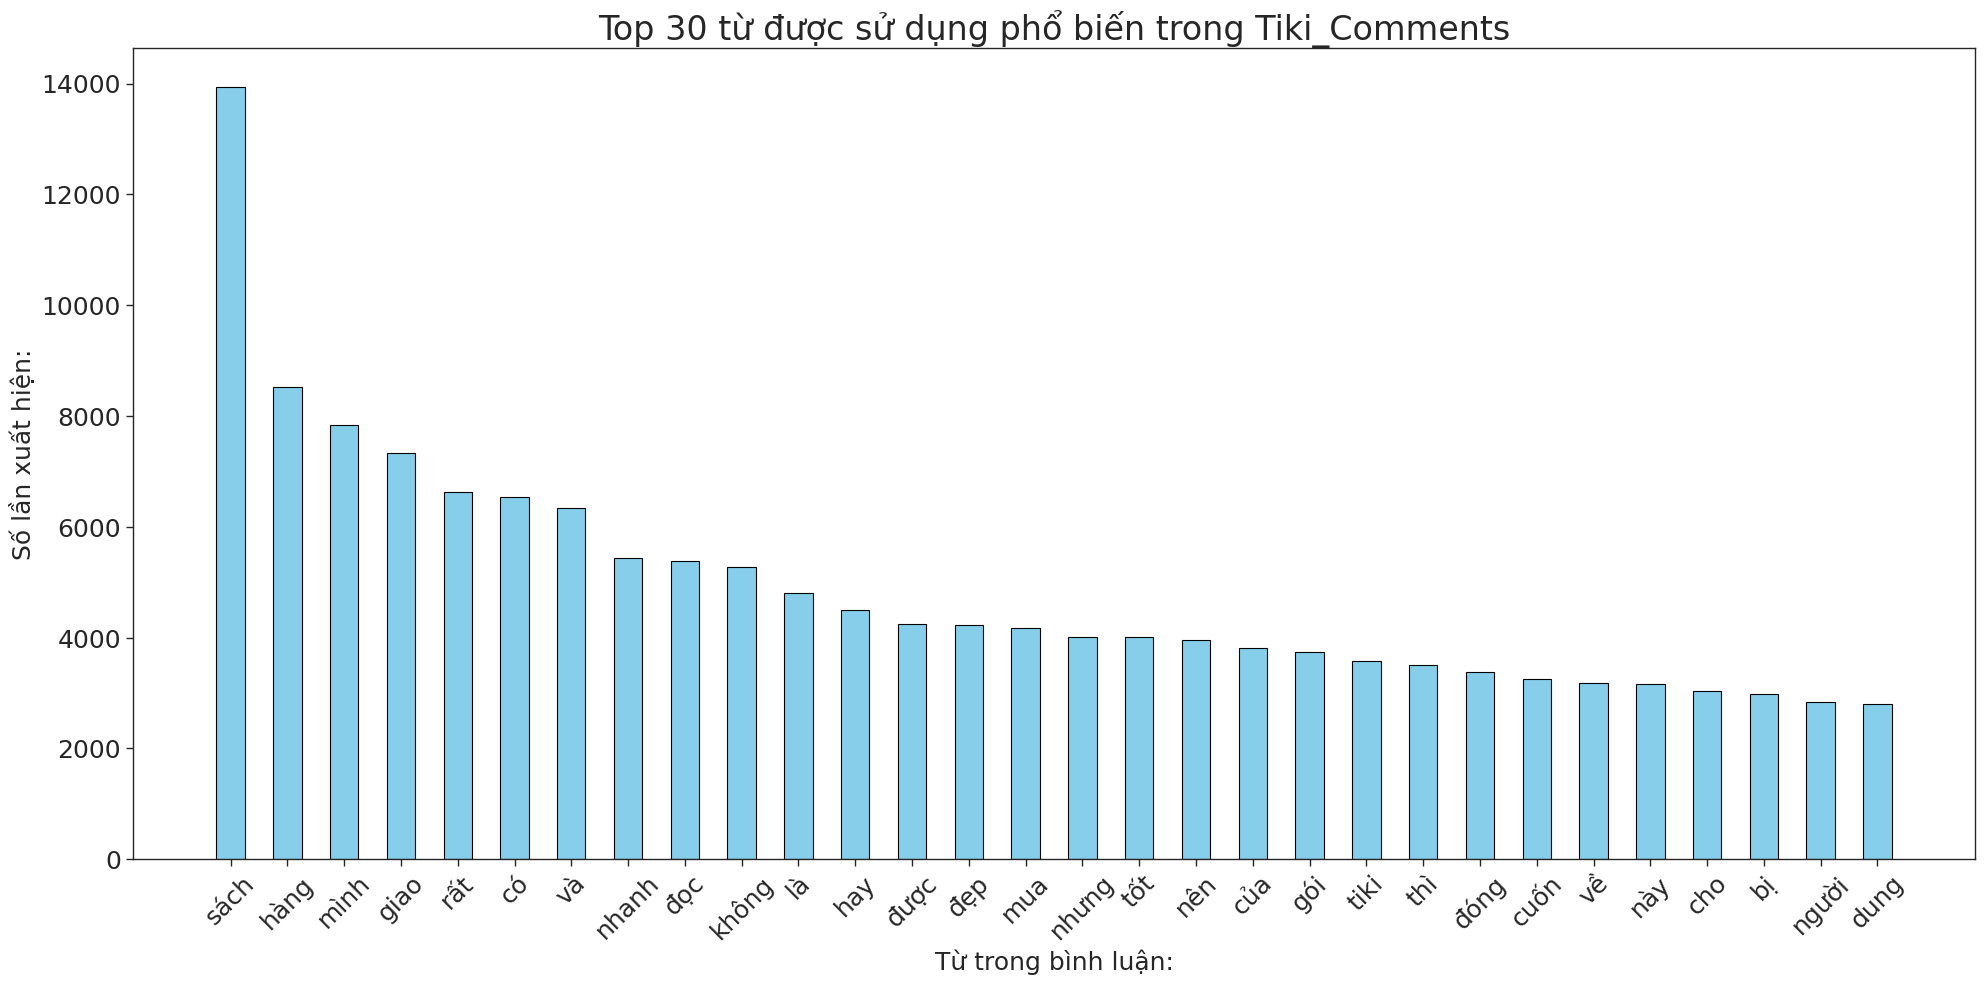

In [680]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

def plotWordFrequencyFromComments(csv_file, top_n=30):
    # ƒê·ªçc d·ªØ li·ªáu b√¨nh lu·∫≠n
    df = pd.read_csv(csv_file)
    
    # Gom to√†n b·ªô n·ªôi dung b√¨nh lu·∫≠n th√†nh m·ªôt danh s√°ch t·ª´
    all_words = []
    for text in df['content'].dropna():   # b·ªè d√≤ng b·ªã NaN
        # ƒê∆∞a v·ªÅ ch·ªØ th∆∞·ªùng
        text = str(text).lower()
        # Lo·∫°i b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát, ch·ªâ gi·ªØ ch·ªØ c√°i v√† kho·∫£ng tr·∫Øng
        text = re.sub(r'[^a-zA-Z√Ä-·ªπ\s]', ' ', text)
        # T√°ch t·ª´
        words = text.split()
        all_words.extend(words)
    
    # ƒê·∫øm t·∫ßn su·∫•t
    counter = Counter(all_words)
    data = counter.most_common(top_n)

    most_words = [x[0] for x in data]
    times_used = [x[1] for x in data]

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(20, 10))
    plt.bar(most_words, times_used, color='skyblue', edgecolor='black', width=0.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('T·ª´ trong b√¨nh lu·∫≠n:', fontsize=18)
    plt.ylabel('S·ªë l·∫ßn xu·∫•t hi·ªán:', fontsize=18)
    plt.title(f'Top {top_n} t·ª´ ƒë∆∞·ª£c s·ª≠ d·ª•ng ph·ªï bi·∫øn trong Tiki_Comments', fontsize=24)
    plt.tight_layout()
    plt.show()

# G·ªçi h√†m
plotWordFrequencyFromComments('Tiki_Comments.csv', top_n=30)


In [682]:
from underthesea import word_tokenize, text_normalize
import re

prefix_words = {
    # --- Ph·ªß ƒë·ªãnh ---
    "kh√¥ng", "ch∆∞a", "ch·∫≥ng", "ch·∫£", "ƒë√¢u", "kh√≥",
    "ch·∫£_h·ªÅ", "ch·∫≥ng_h·ªÅ", "kh√¥ng_h·ªÅ", "ch∆∞a_h·ªÅ",
    "ch·∫≥ng_bao_gi·ªù", "kh√¥ng_bao_gi·ªù",

    # --- TƒÉng c∆∞·ªùng ---
    "si√™u", "c·ª±c", "r·∫•t", "qu√°", "kh√°", "h∆°i", "th·∫≠t",
    "h·∫øt_s·ª©c", "c·ª±c_k·ª≥", "c·ª±c_kiÃÄ", "v√¥_c√πng",
    "kh·ªßng_khi·∫øp", "c·ª±c_ƒë·ªânh", "si√™u_c·∫•p",
    "r·∫•t_chi", "qu√°_ƒë·ªói", "c·ª±c_th√≠ch",

    # --- Tr·∫°ng th√°i / m·ª©c ƒë·ªô ---
    "b·ªã", "m·ªõi", "c≈©", "to", "nh·ªè", "n·∫∑ng", "nh·∫π",
    "cao", "th·∫•p", "·ªïn", "t·∫°m", "g·∫ßn", "xa",
    "gi√†", "tr·∫ª", "k√©m", "x·ªãn", "d·ªü",
    "x·∫•u", "t·ªët", "ch·∫≠m", "nhanh"
}


def clean_data(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    text = text.lower()
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # r√∫t g·ªçn k√Ω t·ª± l·∫∑p
    text = emoji_pattern.sub(r'', text)       # x√≥a emoji
    text = re.sub(r'[^\w\s]', ' ', text)      # x√≥a k√Ω t·ª± ƒë·∫∑c bi·ªát
    text = text_normalize(text)

    # Chu·∫©n h√≥a vi·∫øt t·∫Øt
    words = text.split()
    words = [short_word_dict.get(w, w) for w in words]
    text = ' '.join(words)

    # --- T√°ch t·ª´ ---
    tokens = word_tokenize(text)

    # --- Gh√©p prefix (ph·ªß ƒë·ªãnh/tƒÉng c∆∞·ªùng) ---
    merged_tokens = []
    skip = False
    for i, w in enumerate(tokens):
        if skip:
            skip = False
            continue
        if w in prefix_words and i+1 < len(tokens):
            merged_tokens.append(w + "_" + tokens[i+1])
            skip = True
        else:
            merged_tokens.append(w)

    return " ".join(merged_tokens)


# Test
print(clean_data("S·∫£n ph·∫©m ch∆∞a t·ªët, d·ªãch v·ª• ch∆∞a chu ƒë√°o."))
print(clean_data("M√¨nh ƒë√£ h∆°i ·∫©u khi mua cu·ªën n√†y"))
print(clean_data("ƒêi·ªán tho·∫°i r·∫•t b·ªÅn, pin kh√° ·ªïn ƒë·ªãnh."))
print(clean_data("D·ªãch v·ª• ko t·ªët, b·∫£o h√†nh k r√µ r√†ng."))
print(clean_data(" b·ªçc r·∫•t kƒ© in ·∫•n ƒë·∫πp b√¨a xinh x·ªâu"))



s·∫£n ph·∫©m ch∆∞a_t·ªët d·ªãch v·ª• ch∆∞a_chu ƒë√°o
m√¨nh ƒë√£ h∆°i_·∫©u khi mua cu·ªën n√†y
ƒëi·ªán tho·∫°i r·∫•t_b·ªÅn pin kh√°_·ªïn ƒë·ªãnh
d·ªãch v·ª• kh√¥ng_t·ªët b·∫£o h√†nh kh√¥ng_r√µ r√†ng
b·ªçc r·∫•t_kƒ© in ·∫•n ƒë·∫πp b√¨a xinh x·ªâu


## Chu·∫©n h√≥a d·ªØ li·ªáu

In [684]:
#Chu·∫©n h√≥a c·ªôt content
df['clean_content'] = df['content'].map(lambda text: clean_data(text))

#Chu·∫©n h√≥a c·ªôt title
df['title'] = df['title'].map(lambda text: clean_data(text))
df['title'] = df['title'].str.replace('_', ' ')
# Final check
df.head(10)

title                                            content  rating  \
0         h√†i l√≤ng  S√°ch hay, n·ªôi dung kh√° cu·ªën\r\nKhi s√°ch v·ªÅ ngu...       4   
1  c·ª±c k√¨ h√†i l√≤ng  Beartown: Khi th·ªÉ thao kh√¥ng ch·ªâ l√† th·ªÉ thao\n...       5   
2  c·ª±c k√¨ h√†i l√≤ng  Beartown nh∆∞ nh·ªØng mi√™u t·∫£ l√† n∆°i d·ªã th∆∞·ªùng. X...       5   
3  c·ª±c k√¨ h√†i l√≤ng  M√¨nh ƒë√£ nghƒ© quy·ªÉn n√†y s·∫Ω kh√¥ng qu√° l√¥i cu·ªën, ...       5   
4         h√†i l√≤ng  H√†ng ƒë·∫πp gi√° ·ªïn\r\nGiao nhanh\r\nTiki h·ªó tr·ª£ n...       4   
5         h√†i l√≤ng  N·ªôi dung s√°ch hay, l·ªùi vƒÉn l√¥i cu·ªën, th√≠ch nh·∫•...       4   
6  c·ª±c k√¨ h√†i l√≤ng  Cu·ªën s√°ch s·∫Ω mang l·∫°i cho b·∫°n bi·∫øt r·∫•t nhi·ªÅu ƒë...       5   
7         h√†i l√≤ng  Cu·ªën n√†y t·∫°m ·ªïn. Ko ƒë·ªçc ƒë∆∞·ª£c ƒë·∫øn cu·ªëi do ƒëo·∫°n ...       4   
8      b√¨nh th∆∞·ªùng  S√°ch c√≥ v·∫øt m·ª±c ·ªü nhi·ªÅu trang, m·ªôt s·ªë trang s√°...       3   
9      b√¨nh th∆∞·ªùng  M√¨nh ƒë√£ h∆°i ·∫©u khi mua cu·ªën n√†y v·ªõi suy nghƒ©/t...       3   

                                       clean_content  
0  s√°ch hay n·ªôi dung kh√°_cu·ªën khi s√°ch v·ªÅ nguy√™n ...  
1  beartown khi th·ªÉ thao kh√¥ng_ch·ªâ l√† th·ªÉ thao c·ªë...  
2  beartown nh∆∞ nh·ªØng mi√™u t·∫£ l√† n∆°i d·ªã th∆∞·ªùng xu...  
3  m√¨nh ƒë√£ nghƒ© quy·ªÉn n√†y s·∫Ω kh√¥ng_qu√° l√¥i cu·ªën n...  
4  h√†ng ƒë·∫πp gi√° ·ªïn_giao nhanh_tiki h·ªó tr·ª£ nhi·ªát t...  
5  n·ªôi dung s√°ch hay l·ªùi vƒÉn l√¥i cu·ªën th√≠ch nh·∫•t ...  
6  cu·ªën s√°ch s·∫Ω mang l·∫°i cho b·∫°n bi·∫øt r·∫•t_nhi·ªÅu ƒë...  
7  cu·ªën n√†y t·∫°m_·ªïn kh√¥ng_ƒë·ªçc ƒë∆∞·ª£c ƒë·∫øn cu·ªëi do ƒëo·∫°...  
8  s√°ch c√≥ v·∫øt m·ª±c ·ªü nhi·ªÅu trang m·ªôt s·ªë trang s√°c...  
9  m√¨nh ƒë√£ h∆°i_·∫©u khi mua cu·ªën n√†y v·ªõi suy nghƒ© t...

# Ph√¢n t√≠ch d·ªØ li·ªáu

## M·ª©c ƒë·ªô t·∫≠p trung c·ªßa c√°c t·ª´


Number of words: 19880
Most common words: [('·ªïn', 649), ('t·ªët', 376), ('s√°ch hay', 171), ('good', 155), ('hay', 151), ('giao h√†ng nhanh', 111), ('s·∫£n ph·∫©m t·ªët', 93), ('tuy·ªát v·ªùi', 75), ('s√°ch ƒë·∫πp', 72), ('h√†i l√≤ng', 54), ('giao h√†ng nhanh_ƒë√≥ng g√≥i c·∫©n th·∫≠n', 47), ('s·∫£n ph·∫©m ·ªïn', 47), ('ƒë·∫πp', 44), ('r·∫•t_t·ªët', 43), ('tot', 40)]


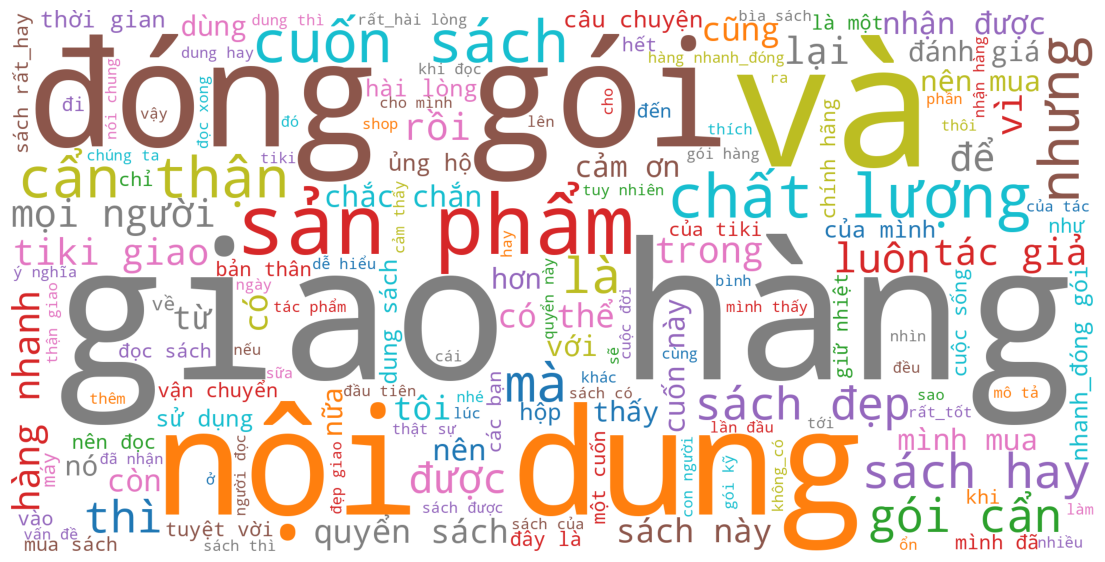

In [686]:
import nltk
from wordcloud import WordCloud
# Create bag-of-words
all_words = [token for token in df['clean_content'].tolist() if token and token != '']

corpus=' '.join(all_words)
all_words = nltk.FreqDist(all_words)

# Print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

plt.figure(figsize=(14, 8))
word_cloud = WordCloud(
    max_words=150,
    background_color="white",
    colormap="tab10",   # m√†u n·ªïi b·∫≠t h∆°n (c√≥ th·ªÉ th·ª≠ 'plasma', 'Set2', 'coolwarm')
    width=2000,
    height=1000,
    mode="RGB"
).generate(corpus)
plt.axis("off")
plt.imshow(word_cloud)

## Ph√¢n t√≠ch ph√¢n ph·ªëi ƒë·ªô d√†i c√¢u trong c√°c ƒë√°nh gi√° c·ªßa kh√°ch h√†ng


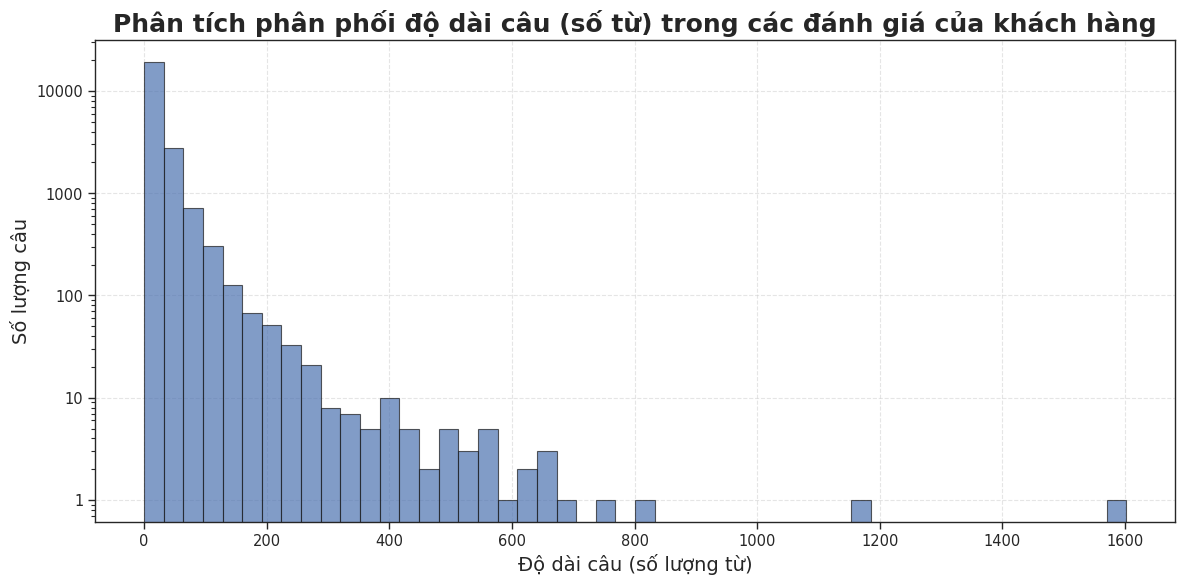

In [688]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# T√≠nh ƒë·ªô d√†i c√¢u theo s·ªë t·ª´
lengths = df['clean_content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(lengths, bins=50, edgecolor='k', alpha=0.7)

plt.title('Ph√¢n t√≠ch ph√¢n ph·ªëi ƒë·ªô d√†i c√¢u (s·ªë t·ª´) trong c√°c ƒë√°nh gi√° c·ªßa kh√°ch h√†ng',
          fontsize=18, fontweight='bold')
plt.xlabel('ƒê·ªô d√†i c√¢u (s·ªë l∆∞·ª£ng t·ª´)', fontsize=14)
plt.ylabel('S·ªë l∆∞·ª£ng c√¢u', fontsize=14)

# ƒê·ªãnh d·∫°ng tr·ª•c y
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Ph√¢n t√≠ch d·ªØ li·ªáu ph√¢n b·ªë gi·ªØa label v√† rating


In [690]:
!{sys.executable} -m pip install seaborn


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13732\2623464876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=top_titles.index, x=top_titles.values, palette='Set2')


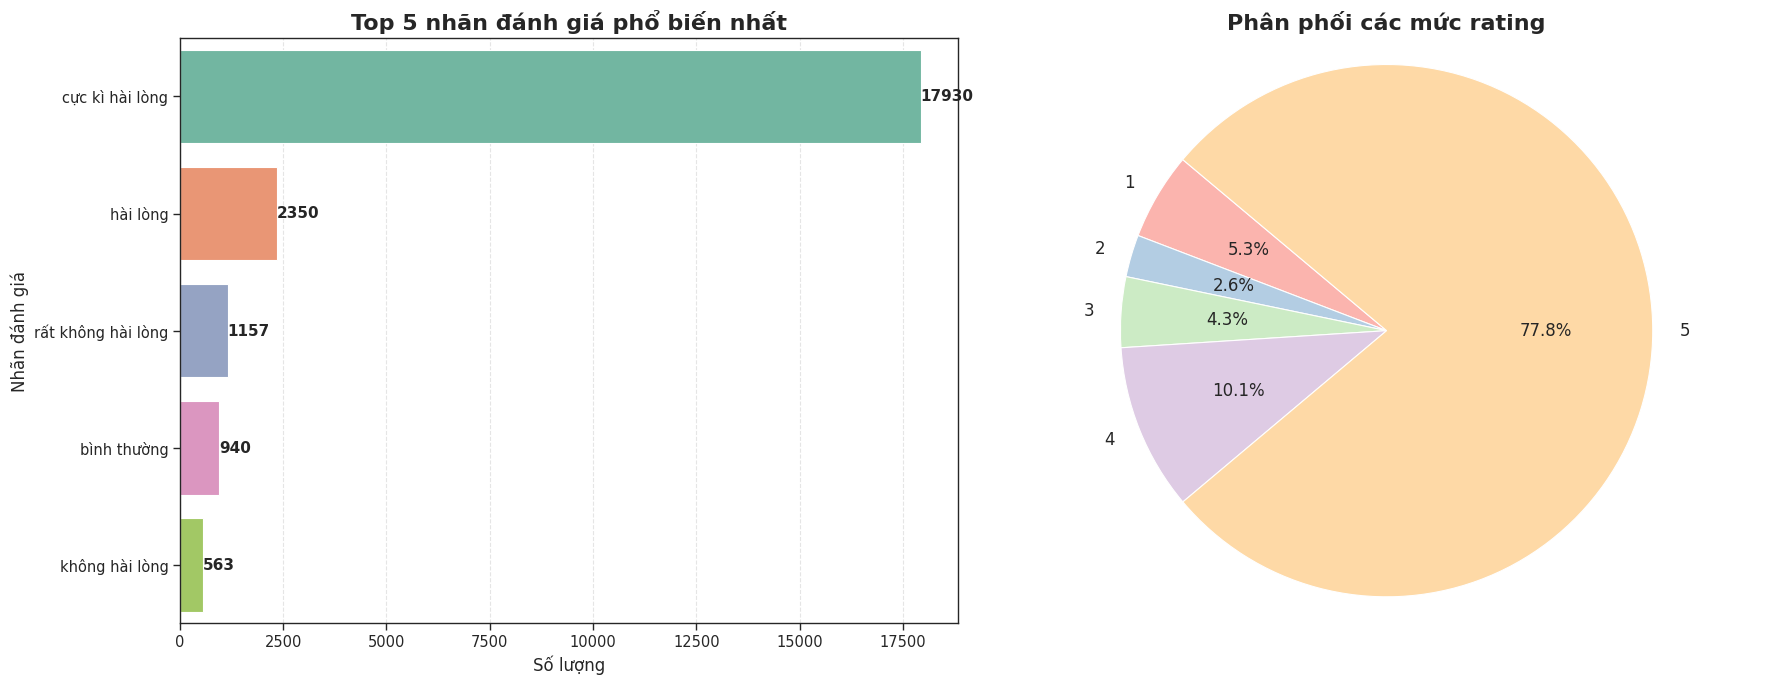

In [692]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

# D·ªØ li·ªáu
top_titles = df['title'].value_counts().nlargest()
rating_counts = df['rating'].value_counts().sort_index()

# T·∫°o figure v·ªõi 2 subplot n·∫±m c·∫°nh nhau
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Bi·ªÉu ƒë·ªì c·ªôt ngang ---
sns.barplot(ax=axes[0], y=top_titles.index, x=top_titles.values, palette='Set2')
axes[0].set_title('Top 5 nh√£n ƒë√°nh gi√° ph·ªï bi·∫øn nh·∫•t', fontsize=16, fontweight='bold')
axes[0].set_xlabel('S·ªë l∆∞·ª£ng', fontsize=12)
axes[0].set_ylabel('Nh√£n ƒë√°nh gi√°', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

# Th√™m annotate s·ªë l∆∞·ª£ng v√†o cu·ªëi m·ªói c·ªôt
for i, v in enumerate(top_titles.values):
    axes[0].text(v + 0.5, i, str(v), va='center', fontsize=11, fontweight='bold')

# --- Bi·ªÉu ƒë·ªì tr√≤n ---
colors = sns.color_palette('Pastel1', len(rating_counts))
axes[1].pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
axes[1].set_title('Ph√¢n ph·ªëi c√°c m·ª©c rating', fontsize=16, fontweight='bold')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


### C·∫ßn b·∫±ng m·∫´u

### C√¢n b·∫±ng m·∫´u v·ªõi 3 nh√£n


#### Gom th√†nh 3 nh√£n


In [694]:
def chuan_hoa_title_3(row):
    if row['rating'] in [4, 5]:
        return 'c·ª±c k·ª≥ h√†i l√≤ng'
    elif row['rating'] in [1, 2]:
        return 'kh√¥ng h√†i l√≤ng'
    else:
        return 'trung l·∫≠p/ch∆∞a ƒë√°nh gi√°'

df['title'] = df.apply(chuan_hoa_title_3, axis=1)
print(df['title'].value_counts())


title
c·ª±c k·ª≥ h√†i l√≤ng            20547
kh√¥ng h√†i l√≤ng              1837
trung l·∫≠p/ch∆∞a ƒë√°nh gi√°     1001
Name: count, dtype: int64


#### Tr·ª±c quan d·ªØ li·ªáu 3 nh√£n


Most common words - C·ª±c k·ª≥ h√†i l√≤ng: [('·ªïn', 647), ('t·ªët', 375), ('s√°ch hay', 170), ('good', 155), ('hay', 151), ('giao h√†ng nhanh', 111), ('s·∫£n ph·∫©m t·ªët', 93), ('tuy·ªát v·ªùi', 75), ('s√°ch ƒë·∫πp', 72), ('h√†i l√≤ng', 51), ('s·∫£n ph·∫©m ·ªïn', 47), ('giao h√†ng nhanh_ƒë√≥ng g√≥i c·∫©n th·∫≠n', 46), ('ƒë·∫πp', 44), ('r·∫•t_t·ªët', 43), ('tot', 40)]
Most common words - Kh√¥ng h√†i l√≤ng: [('ch·∫•t l∆∞·ª£ng gi·∫•y kh√¥ng_t·ªët', 2), ('th√°i ƒë·ªô nh√¢n vi√™n kh√¥ng_t·ªët g·ªçi ƒëi·ªán l√∫c ƒë√™m khuya', 2), ('nhi·ªÅu c√¢u trong s√°ch sai ch√≠nh t·∫£', 1), ('ƒë√¢y l√† c√°i ƒë√°nh gi√° 1 sao ƒë·∫ßu ti√™n trong ƒë·ªùi t√¥i lu√¥n tiki n√™n xem l·∫°i c√°ch ƒë√≥ng g√≥i qu√°_t·ªá cho √¢m sao ƒë∆∞·ª£c l√† t√¥i c≈©ng ƒë√°nh gi√° lu√¥n √Ω s√°ch kh√¥ng_c√≥ l·∫•y th√™m 1 l·ªõp b·ªçc ph·ª• n√†o ngo√†i th√πng m√† th√πng th√¨ t√©t n√°t b√©t b√¨a c·ª©ng m√† m√≥p h·∫øt 4 g√≥c d√πng bookcare m√† c√°i b·ªçc plastic n√≥ r√°ch r·ªõt ra kh·ªèi cu·ªën s√°ch b√¨a s√°ch c√≤n b·ªã_x∆∞·ªõc m·∫

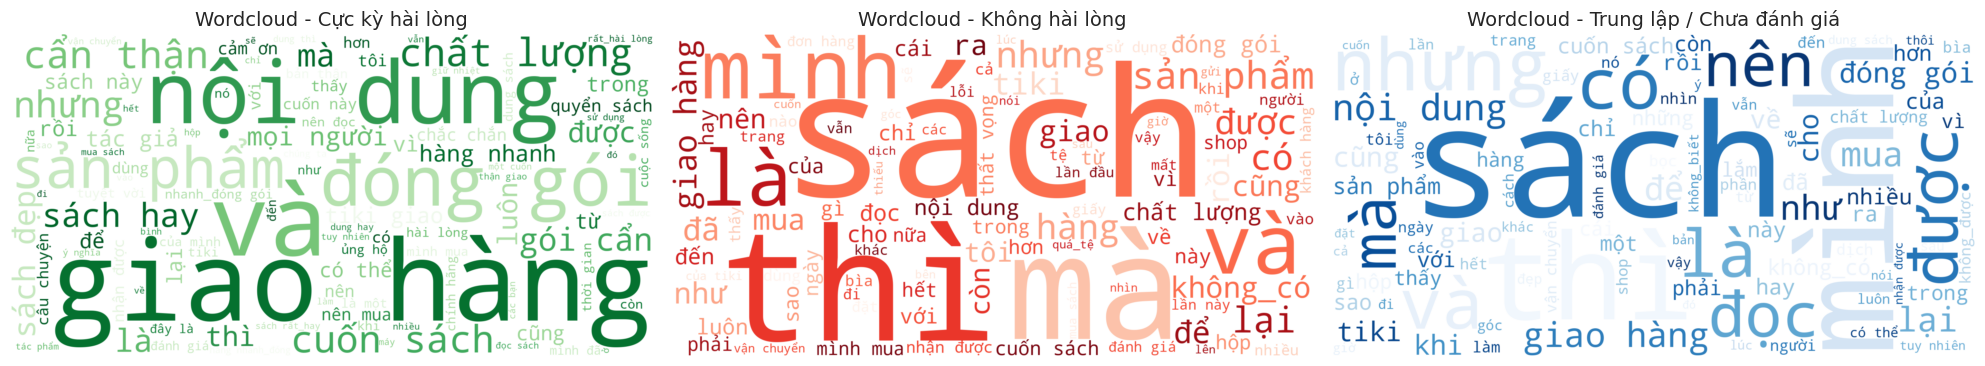

In [696]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- H√†m ti·ªán √≠ch ---
def get_tokens_by_label(df, label_col, label_value, text_col='clean_content'):
    """L·∫•y list c√°c token theo nh√£n"""
    return [token for token in df[df[label_col] == label_value][text_col].tolist() if token and token != '']

# --- T·∫°o token list cho t·ª´ng nh√≥m ---
happy_words = get_tokens_by_label(df, 'title', 'c·ª±c k·ª≥ h√†i l√≤ng')
unhappy_words = get_tokens_by_label(df, 'title', 'kh√¥ng h√†i l√≤ng')
neutral_words = get_tokens_by_label(df, 'title', 'trung l·∫≠p/ch∆∞a ƒë√°nh gi√°')

# --- Corpus ---
happy_corpus = ' '.join(happy_words)
unhappy_corpus = ' '.join(unhappy_words)
neutral_corpus = ' '.join(neutral_words)

# --- FreqDist ---
happy_freq_dist = nltk.FreqDist(happy_words)
unhappy_freq_dist = nltk.FreqDist(unhappy_words)
neutral_freq_dist = nltk.FreqDist(neutral_words)

# --- In th·ªëng k√™ ---
print('Most common words - C·ª±c k·ª≥ h√†i l√≤ng:', happy_freq_dist.most_common(15))
print('Most common words - Kh√¥ng h√†i l√≤ng:', unhappy_freq_dist.most_common(15))
print('Most common words - Trung l·∫≠p/Ch∆∞a ƒë√°nh gi√°:', neutral_freq_dist.most_common(15))

# --- V·∫Ω WordCloud cho c·∫£ 3 nh√£n ---
plt.figure(figsize=(20, 8))

# 1. C·ª±c k·ª≥ h√†i l√≤ng
plt.subplot(1, 3, 1)
word_cloud_happy = WordCloud(max_words=100, background_color="white", colormap="Greens", width=2000, height=1000).generate(happy_corpus)
plt.imshow(word_cloud_happy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - C·ª±c k·ª≥ h√†i l√≤ng", fontsize=14)

# 2. Kh√¥ng h√†i l√≤ng
plt.subplot(1, 3, 2)
word_cloud_unhappy = WordCloud(max_words=100, background_color="white", colormap="Reds", width=2000, height=1000).generate(unhappy_corpus)
plt.imshow(word_cloud_unhappy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Kh√¥ng h√†i l√≤ng", fontsize=14)

# 3. Trung l·∫≠p / Ch∆∞a ƒë√°nh gi√°
plt.subplot(1, 3, 3)
word_cloud_neutral = WordCloud(max_words=100, background_color="white", colormap="Blues", width=2000, height=1000).generate(neutral_corpus)
plt.imshow(word_cloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Trung l·∫≠p / Ch∆∞a ƒë√°nh gi√°", fontsize=14)

plt.tight_layout()
plt.show()


In [704]:
# L·ªçc c√°c c√¢u thu·ªôc nh√£n trung l·∫≠p / b√¨nh th∆∞·ªùng
neutral_df = df[df['title'] == 'trung l·∫≠p/ch∆∞a ƒë√°nh gi√°'].copy()

# Ho·∫∑c n·∫øu nh√£n l√† 'b√¨nh th∆∞·ªùng'
# neutral_df = df_oversampled[df_oversampled['label'] == 'b√¨nh th∆∞·ªùng'].copy()

# Hi·ªÉn th·ªã 10 c√¢u ƒë·∫ßu
print(neutral_df[['clean_content', 'title']].head(20))

# N·∫øu mu·ªën xem to√†n b·ªô ho·∫∑c m·ªôt range
# display(neutral_df[['clean_content', 'title']].iloc[0:20])


                                          clean_content  \
8     s√°ch c√≥ v·∫øt m·ª±c ·ªü nhi·ªÅu trang m·ªôt s·ªë trang s√°c...   
9     m√¨nh ƒë√£ h∆°i_·∫©u khi mua cu·ªën n√†y v·ªõi suy nghƒ© t...   
202   not good experience because of shipper sao bad...   
456   tiki giao nhanh_ƒë√≥ng g√≥i c·∫©n th·∫≠n nh∆∞ng ƒë·ªçc ƒë∆∞...   
457   n·ªôi dung s√°ch hay kh√¥ng_c·∫ßn b√†n c√£i nh∆∞ng ch·∫•t...   
471                giao h√†ng ch·∫≠m_h∆°n th·ªùi gian cam k·∫øt   
472   h√†ng giao nhanh_ƒë√∫ng h·∫πn ƒë√≥ng g√≥i c·∫©n th·∫≠n c√≤n...   
480         giao h√†nh nhanh_nh∆∞ng tiki bookcare b·ªã_r√°ch   
671   b·∫°n n√†o th√≠ch t√°c gi·∫£ carl jung m√† mu·ªën ƒë·ªçc qu...   
717   trang 34 b·ªã_in l·ªói ƒë√∫ng ph·∫ßn m√¨nh ƒë·ªçc v√†o m·∫°ch...   
719   s√°ch m√¨nh nh·∫≠n ng√†y 26 2 2023 b·ªã_l·ªói in ng∆∞·ª£c ...   
788                    s√°ch r·∫•t_b·ª•i d∆° ƒë·∫øn c·∫£ ph·∫ßn gi·∫•y   
872   ƒë√°nh gi√° kh√¥ng_t√≠nh ƒëi·ªÉm s√°ch m√≥p c·∫°nh h·ªôp ƒë·ª±n...   
873   ƒë√°nh gi√° kh√¥ng_

### 2 nh√£n

In [706]:

def chuan_hoa_title(row):
    if row['rating'] == 5 or row['rating'] == 4:
        return 'c·ª±c k·ª≥ h√†i l√≤ng'
    else:
        return 'kh√¥ng h√†i l√≤ng'

df['title'] = df.apply(chuan_hoa_title, axis=1)
print(df['title'].value_counts())

title
c·ª±c k·ª≥ h√†i l√≤ng    20547
kh√¥ng h√†i l√≤ng      2838
Name: count, dtype: int64


In [709]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# T·∫°o danh s√°ch t·ª´ cho 'c·ª±c k·ª≥ h√†i l√≤ng' v√† 'kh√¥ng h√†i l√≤ng'
happy_words = [token for token in df[df['title'] == 'c·ª±c k·ª≥ h√†i l√≤ng']['clean_content'].tolist() if token and token != '']
unhappy_words = [token for token in df[df['title'] == 'kh√¥ng h√†i l√≤ng']['clean_content'].tolist() if token and token != '']

# T·∫°o corpus t·ª´ c√°c t·ª´ trong t·ª´ng nh√≥m
happy_corpus = ' '.join(happy_words)
unhappy_corpus = ' '.join(unhappy_words)

# T·∫°o frequency distribution cho m·ªói nh√≥m
happy_freq_dist = nltk.FreqDist(happy_words)
unhappy_freq_dist = nltk.FreqDist(unhappy_words)

# In t·ªïng s·ªë t·ª´ v√† 15 t·ª´ ph·ªï bi·∫øn nh·∫•t cho t·ª´ng nh√≥m
print('Number of words in C·ª±c k·ª≥ h√†i l√≤ng: {}'.format(len(happy_words)))
print('Most common words in C·ª±c k·ª≥ h√†i l√≤ng: {}'.format(happy_freq_dist.most_common(15)))

print('Number of words in Kh√¥ng h√†i l√≤ng: {}'.format(len(unhappy_words)))
print('Most common words in Kh√¥ng h√†i l√≤ng: {}'.format(unhappy_freq_dist.most_common(15)))

# V·∫Ω wordcloud cho 'c·ª±c k·ª≥ h√†i l√≤ng'
plt.figure(figsize=(12, 8))

# Wordcloud cho nh√≥m 'c·ª±c k·ª≥ h√†i l√≤ng'
plt.subplot(1, 2, 1)
word_cloud_happy = WordCloud(max_words=100, background_color="white", width=2000, height=1000, mode="RGB").generate(happy_corpus)
plt.imshow(word_cloud_happy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - C·ª±c k·ª≥ h√†i l√≤ng")

# Wordcloud cho nh√≥m 'kh√¥ng h√†i l√≤ng'
plt.subplot(1, 2, 2)
word_cloud_unhappy = WordCloud(max_words=100, background_color="white", width=2000, height=1000, mode="RGB").generate(unhappy_corpus)
plt.imshow(word_cloud_unhappy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Kh√¥ng h√†i l√≤ng")

plt.tight_layout()
plt.show()


Number of words in C·ª±c k·ª≥ h√†i l√≤ng: 20482
Most common words in C·ª±c k·ª≥ h√†i l√≤ng: [('·ªïn', 647), ('t·ªët', 375), ('s√°ch hay', 170), ('good', 155), ('hay', 151), ('giao h√†ng nhanh', 111), ('s·∫£n ph·∫©m t·ªët', 93), ('tuy·ªát v·ªùi', 75), ('s√°ch ƒë·∫πp', 72), ('h√†i l√≤ng', 51), ('s·∫£n ph·∫©m ·ªïn', 47), ('giao h√†ng nhanh_ƒë√≥ng g√≥i c·∫©n th·∫≠n', 46), ('ƒë·∫πp', 44), ('r·∫•t_t·ªët', 43), ('tot', 40)]
Number of words in Kh√¥ng h√†i l√≤ng: 2838
Most common words in Kh√¥ng h√†i l√≤ng: [('h√†i l√≤ng', 3), ('·ªïn', 2), ('ch·∫•t l∆∞·ª£ng gi·∫•y kh√¥ng_t·ªët', 2), ('th√°i ƒë·ªô nh√¢n vi√™n kh√¥ng_t·ªët g·ªçi ƒëi·ªán l√∫c ƒë√™m khuya', 2), ('ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m kh√¥ng_t·ªët', 2), ('s·∫£n ph·∫©m t·ªët_giao h√†ng nhanh ch√≥ng', 2), ('s√°ch c√≥ v·∫øt m·ª±c ·ªü nhi·ªÅu trang m·ªôt s·ªë trang s√°ch in b·ªã_l·ªách n√™n l√†m m√¨nh c√≥ tr·∫£i nghi·ªám kh√¥ng_t·ªët', 1), ('m√¨nh ƒë√£ h∆°i_·∫©u khi mua cu·ªën n√†y v·ªõi suy nghƒ© tr√≠ nh·ªõ sai l·∫ßm ki·ªÉu b·∫•t c·ª© cu·ªën n√

#### Chia ƒë·ªÅu t·∫≠p d·ªØ li·ªáu

In [711]:
import random
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

# L·∫•y t·ª´ ƒë·ªìng nghƒ©a
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").lower()
            if synonym != word:
                synonyms.add(synonym)
    return list(synonyms)

# 1. Synonym Replacement
def synonym_replacement(words, n=1):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if len(get_synonyms(word)) > 0]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return new_words

# 2. Random Insertion
def random_insertion(words, n=1):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = random.choice(new_words)
        synonyms = get_synonyms(random_word)
        counter += 1
    if len(synonyms) > 0:
        random_synonym = random.choice(synonyms)
        insert_pos = random.randint(0, len(new_words)-1)
        new_words.insert(insert_pos, random_synonym)

# 3. Random Swap
def random_swap(words, n):
    new_words = words.copy()
    if len(new_words) < 2:  # N·∫øu c√¢u ng·∫Øn qu√° th√¨ return lu√¥n
        return new_words
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words


def swap_word(new_words):
    new_words = new_words.copy()
    idx1, idx2 = random.sample(range(len(new_words)), 2)
    new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

# 4. Random Deletion
def random_deletion(words, p=0.1):
    if len(words) == 1:
        return words
    new_words = []
    for word in words:
        r = random.uniform(0,1)
        if r > p:
            new_words.append(word)
    if len(new_words) == 0:
        return [random.choice(words)]
    return new_words

# H√†m EDA t·ªïng h·ª£p
def eda(sentence, num_aug=4):
    words = sentence.split()
    augmented_sentences = []
    
    augmented_sentences.append(" ".join(synonym_replacement(words, n=1)))
    augmented_sentences.append(" ".join(random_insertion(words, n=1)))
    augmented_sentences.append(" ".join(random_swap(words, n=1)))
    augmented_sentences.append(" ".join(random_deletion(words, p=0.1)))
    
    return augmented_sentences[:num_aug]


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [713]:
text = "s·∫£n ph·∫©m n√†y r·∫•t t·ªët v√† b·ªÅn"
print("Original:", text)
print("Augmented:", eda(text, num_aug=4))


Original: s·∫£n ph·∫©m n√†y r·∫•t t·ªët v√† b·ªÅn
Augmented: ['s·∫£n ph·∫©m n√†y r·∫•t t·ªët v√† b·ªÅn', 's·∫£n ph·∫©m n√†y r·∫•t t·ªët v√† b·ªÅn', 's·∫£n ph·∫©m n√†y r·∫•t t·ªët b·ªÅn v√†', 's·∫£n ph·∫©m n√†y r·∫•t t·ªët v√† b·ªÅn']


In [715]:
import pandas as pd

# ƒê·∫øm s·ªë l∆∞·ª£ng m·∫´u m·ªói nh√£n
label_counts = df['title'].value_counts()
print("Ph√¢n ph·ªëi ban ƒë·∫ßu:")
print(label_counts)

# L·∫•y s·ªë l∆∞·ª£ng l·ªõn nh·∫•t ƒë·ªÉ c√¢n b·∫±ng
max_count = label_counts.max()

# H√†m augment d·ªØ li·ªáu b·∫±ng EDA
def augment_texts(group, target_size):
    augmented_rows = []
    need = target_size - len(group)
    per_sample = max(1, need // len(group))
    
    for _, row in group.iterrows():
        augmented = eda(row['clean_content'], num_aug=per_sample)
        for text in augmented:
            augmented_rows.append({
                "clean_content": text,
                "title": row['title']
            })
        if len(augmented_rows) >= need:
            break
    return pd.DataFrame(augmented_rows)

# Sinh d·ªØ li·ªáu cho t·ª´ng nh√£n
dfs = []
for label, group in df.groupby('title'):
    if len(group) < max_count:
        aug_df = augment_texts(group, max_count)
        dfs.append(pd.concat([group, aug_df], axis=0))
    else:
        dfs.append(group)

# Gh√©p l·∫°i th√†nh dataset c√¢n b·∫±ng
df_balanced_2_label = pd.concat(dfs, axis=0)
df_balanced_2_label = df_balanced_2_label.sample(frac=1, random_state=42).reset_index(drop=True)

# Ki·ªÉm tra ph√¢n ph·ªëi
print("\nPh√¢n ph·ªëi sau khi EDA:")
print(df_balanced_2_label['title'].value_counts())

# Xu·∫•t CSV
df_balanced_2_label.to_csv("df_balanced_2_label.csv", index=False)


Ph√¢n ph·ªëi ban ƒë·∫ßu:
title
c·ª±c k·ª≥ h√†i l√≤ng    20547
kh√¥ng h√†i l√≤ng      2838
Name: count, dtype: int64

Ph√¢n ph·ªëi sau khi EDA:
title
c·ª±c k·ª≥ h√†i l√≤ng    20547
kh√¥ng h√†i l√≤ng     14190
Name: count, dtype: int64


In [717]:
import pandas as pd

# Gi·∫£ s·ª≠ df_balanced_2_label l√† k·∫øt qu·∫£ sau EDA
label_counts = df_balanced_2_label['title'].value_counts()
print("Ph√¢n ph·ªëi hi·ªán t·∫°i sau EDA:")
print(label_counts)

# X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng nh√£n "kh√¥ng h√†i l√≤ng"
minority_count = label_counts['kh√¥ng h√†i l√≤ng']

# L·∫•y nh√£n ƒë√¥ng h∆°n "c·ª±c k·ª≥ h√†i l√≤ng" b·∫±ng s·ªë l∆∞·ª£ng nh√£n √≠t h∆°n
df_majority = df_balanced_2_label[df_balanced_2_label['title'] == 'c·ª±c k·ª≥ h√†i l√≤ng'].sample(
    n=minority_count, random_state=42
)
df_minority = df_balanced_2_label[df_balanced_2_label['title'] == 'kh√¥ng h√†i l√≤ng']

# K·∫øt h·ª£p 2 nh√£n ƒë·ªÉ c√¢n b·∫±ng
df_final = pd.concat([df_majority, df_minority], axis=0)
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Ki·ªÉm tra ph√¢n ph·ªëi
print("\nPh√¢n ph·ªëi cu·ªëi c√πng c√¢n b·∫±ng theo nh√£n 'kh√¥ng h√†i l√≤ng':")
print(df_final['title'].value_counts())

# Xu·∫•t CSV n·∫øu mu·ªën
df_final.to_csv("df_balanced_equal_2_label.csv", index=False)


Ph√¢n ph·ªëi hi·ªán t·∫°i sau EDA:
title
c·ª±c k·ª≥ h√†i l√≤ng    20547
kh√¥ng h√†i l√≤ng     14190
Name: count, dtype: int64

Ph√¢n ph·ªëi cu·ªëi c√πng c√¢n b·∫±ng theo nh√£n 'kh√¥ng h√†i l√≤ng':
title
kh√¥ng h√†i l√≤ng     14190
c·ª±c k·ª≥ h√†i l√≤ng    14190
Name: count, dtype: int64


In [719]:
import pandas as pd
import unicodedata
import re

# 1Ô∏è‚É£ ƒê·ªçc d·ªØ li·ªáu c√¢n b·∫±ng ƒë√£ l∆∞u
df_balanced = pd.read_csv("df_balanced_equal_2_label.csv")

# 2Ô∏è‚É£ H√†m lo·∫°i b·ªè d·∫•u ti·∫øng Vi·ªát
def remove_diacritics(text):
    if not isinstance(text, str):
        return ''
    # Lo·∫°i b·ªè d·∫•u
    text = unicodedata.normalize('NFD', text)
    text = ''.join([c for c in text if unicodedata.category(c) != 'Mn'])
    # Lo·∫°i b·ªè k√Ω t·ª± kh√¥ng ph·∫£i ch·ªØ/s·ªë v√† g·ªôp kho·∫£ng tr·∫Øng
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 3Ô∏è‚É£ T·∫°o b·∫£n copy kh√¥ng d·∫•u t·ª´ text g·ªëc (content)
df_no_diacritics = df_balanced.copy()
df_no_diacritics['clean_content'] = df_no_diacritics['content'].astype(str).apply(remove_diacritics)

# 4Ô∏è‚É£ Gh√©p d·ªØ li·ªáu g·ªëc + b·∫£n kh√¥ng d·∫•u v√† tr·ªôn
df_augmented = pd.concat([df_balanced, df_no_diacritics], axis=0)\
                 .sample(frac=1, random_state=42)\
                 .reset_index(drop=True)

# 5Ô∏è‚É£ Ki·ªÉm tra
print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu g·ªëc:", len(df_balanced))
print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi th√™m kh√¥ng d·∫•u:", len(df_augmented))
print(df_augmented.head())

# 6Ô∏è‚É£ L∆∞u ra CSV n·∫øu mu·ªën
df_augmented.to_csv("df_augmented_no_diacritics.csv", index=False)


K√≠ch th∆∞·ªõc d·ªØ li·ªáu g·ªëc: 28380
K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi th√™m kh√¥ng d·∫•u: 56760
             title                                            content  rating  \
0  c·ª±c k·ª≥ h√†i l√≤ng  giao h√†ng nhanh, nay mua c√≤n √©c m√£ 40k ti·∫øt ki...     5.0   
1  c·ª±c k·ª≥ h√†i l√≤ng  D√π phong c√°ch vi·∫øt kh√° l·∫°\nNma v√¨ s√°ch d√†y n√™n...     4.0   
2  c·ª±c k·ª≥ h√†i l√≤ng  S√°ch hay √Ω nghƒ©a. Cho ta th√™m g√≥c nh√¨n c·ªßa 1 p...     5.0   
3   kh√¥ng h√†i l√≤ng                                                NaN     NaN   
4  c·ª±c k·ª≥ h√†i l√≤ng  S√°ch hay. Th·ª±c t·∫ø v√† s√∫c t√≠ch. C√≥ th·ªÉ √°p d·ª•ng ...     5.0   

                                       clean_content  
0  giao h√†ng nhanh_nay mua c√≤n √©c m√£ 40 kh√¥ng_ti·∫ø...  
1  d√π phong c√°ch vi·∫øt kh√°_l·∫° nma v√¨ s√°ch d√†y n√™n ...  
2  Sach hay y nghia Cho ta them goc nhin cua 1 ph...  
3  s√°ch b·ªã_m√≥p m√©o nh√¨n nh∆∞ c≈©_v·∫≠y c√≤n b·ªã_x∆∞·ªõc v√†...  
4  Sach hay Thuc te va suc tich Co t

In [767]:
print("Ph√¢n ph·ªëi sau khi th√™m d·ªØ li·ªáu kh√¥ng d·∫•u:")
print(df_augmented['title'].value_counts())


Ph√¢n ph·ªëi sau khi th√™m d·ªØ li·ªáu kh√¥ng d·∫•u:
title
c·ª±c k·ª≥ h√†i l√≤ng    28380
kh√¥ng h√†i l√≤ng     28380
Name: count, dtype: int64


#### So s√°nh

In [723]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

# D·ªØ li·ªáu
before_balance = df['title'].value_counts().sort_index()
after_balance = df_augmented['title'].value_counts().sort_index()

# T·∫°o figure v·ªõi 2 subplot n·∫±m c·∫°nh nhau
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Bi·ªÉu ƒë·ªì c·ªôt ƒë·ª©ng: Tr∆∞·ªõc khi c√¢n b·∫±ng ---
sns.barplot(ax=axes[0], x=before_balance.index, y=before_balance.values, palette='Set2')
axes[0].set_title('Ph√¢n ph·ªëi nh√£n tr∆∞·ªõc khi c√¢n b·∫±ng', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Nh√£n ƒë√°nh gi√°', fontsize=12)
axes[0].set_ylabel('S·ªë l∆∞·ª£ng', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Hi·ªÉn th·ªã s·ªë li·ªáu tr√™n c·ªôt
for i, v in enumerate(before_balance.values):
    axes[0].text(i, v + 300, str(v), ha='center', fontsize=11)

# --- Bi·ªÉu ƒë·ªì c·ªôt ƒë·ª©ng: Sau khi c√¢n b·∫±ng ---
sns.barplot(ax=axes[1], x=after_balance.index, y=after_balance.values, palette='Pastel1')
axes[1].set_title('Ph√¢n ph·ªëi nh√£n sau khi c√¢n b·∫±ng', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Nh√£n ƒë√°nh gi√°', fontsize=12)
axes[1].set_ylabel('S·ªë l∆∞·ª£ng', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Hi·ªÉn th·ªã s·ªë li·ªáu tr√™n c·ªôt
for i, v in enumerate(after_balance.values):
    axes[1].text(i, v + 300, str(v), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13732\1995427718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=before_balance.index, y=before_balance.values, palette='Set2')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13732\1995427718.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=after_balance.index, y=after_balance.values, palette='Pastel1')


### Chia t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán v√† ki·ªÉm tra 80 - 20


In [725]:
from sklearn.model_selection import train_test_split

# L·ªçc 2 nh√£n c·∫ßn chia
df_2_label = df_augmented[df_augmented['title'].isin(['c·ª±c k·ª≥ h√†i l√≤ng', 'kh√¥ng h√†i l√≤ng'])].copy()

# Ki·ªÉm tra ph√¢n ph·ªëi
print("T·ªïng s·ªë m·∫´u 2 nh√£n:", len(df_2_label))
print("Ph√¢n ph·ªëi nh√£n tr∆∞·ªõc khi chia:")
print(df_2_label['title'].value_counts())

# Chia 80/20, stratify ƒë·ªÉ gi·ªØ c√¢n b·∫±ng
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    df_2_label['clean_content'],
    df_2_label['title'],
    test_size=0.2,
    random_state=42,
    stratify=df_2_label['title']  # gi·ªØ c√¢n b·∫±ng nh√£n
)

# Ki·ªÉm tra k·∫øt qu·∫£
print("\nS·ªë m·∫´u t·∫≠p train:", len(train_sentences))
print("S·ªë m·∫´u t·∫≠p test:", len(test_sentences))

print("\nPh√¢n ph·ªëi nh√£n trong t·∫≠p train:")
print(train_labels.value_counts())

print("\nPh√¢n ph·ªëi nh√£n trong t·∫≠p test:")
print(test_labels.value_counts())


T·ªïng s·ªë m·∫´u 2 nh√£n: 56760
Ph√¢n ph·ªëi nh√£n tr∆∞·ªõc khi chia:
title
c·ª±c k·ª≥ h√†i l√≤ng    28380
kh√¥ng h√†i l√≤ng     28380
Name: count, dtype: int64

S·ªë m·∫´u t·∫≠p train: 45408
S·ªë m·∫´u t·∫≠p test: 11352

Ph√¢n ph·ªëi nh√£n trong t·∫≠p train:
title
kh√¥ng h√†i l√≤ng     22704
c·ª±c k·ª≥ h√†i l√≤ng    22704
Name: count, dtype: int64

Ph√¢n ph·ªëi nh√£n trong t·∫≠p test:
title
c·ª±c k·ª≥ h√†i l√≤ng    5676
kh√¥ng h√†i l√≤ng     5676
Name: count, dtype: int64


### Danh s√°ch c√°c t·ª´ c·∫•m

In [727]:
import re

# --- B∆∞·ªõc 1: Load danh s√°ch t·ª´ c·∫•m ---
def load_bad_words(filepath="bad_words.txt"):
    with open(filepath, "r", encoding="utf-8") as f:
        bad_words = [line.strip().lower() for line in f if line.strip()]
    return bad_words

bad_words = load_bad_words("bad_words.txt")

# --- B∆∞·ªõc 2: Ki·ªÉm tra vi ph·∫°m ---
def get_violations(comment, bad_words):
    comment_lower = comment.lower()
    violations = []
    for word in bad_words:
        if re.search(rf"\b{re.escape(word)}\b", comment_lower):
            violations.append(word)
    return violations

# --- B∆∞·ªõc 3: H√†m d·ª± ƒëo√°n cu·ªëi ---
def process_comment(comment, model, vectorizer, bad_words):
    violations = get_violations(comment, bad_words)
    if violations:
        return f"B√¨nh lu·∫≠n ch·ª©a t·ª´ kh√≥a kh√¥ng h·ª£p l·ªá: {', '.join(violations)}"
    else:
        X = vectorizer.transform([comment])
        prediction = model.predict(X)[0]
        return prediction


## Text Feature


### Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng cho Machine Learning.
#### CountVectorizer (scikit-learn)
##### M·ª•c ti√™u:
##### Bi·ªÉu di·ªÖn c√¢u th√†nh vector ƒë·∫∑c tr∆∞ng theo d·∫°ng

* Bag-of-Words: ƒë·∫øm s·ªë l·∫ßn m·ªói t·ª´ xu·∫•t hi·ªán trong c√¢u.
* V·ªã tr√≠ t·ª´: Kh√¥ng quan t√¢m
* Ph√π h·ª£p: Machine
* ƒê·∫ßu ra: Ma tr·∫≠n ƒë·∫øm t·ª´

In [733]:
from sklearn.feature_extraction.text import CountVectorizer

# Lo·∫°i b·ªè NaN
train_sentences = train_sentences.dropna()
test_sentences = test_sentences.dropna()

# N·∫øu mu·ªën gi·ªØ nh√£n t∆∞∆°ng ·ª©ng, c≈©ng l·ªçc theo index
train_labels = train_labels[train_sentences.index]
test_labels = test_labels[test_sentences.index]

# Kh·ªüi t·∫°o vectorizer
vectorizer_2 = CountVectorizer()

# Fit v√† transform
X_train_2_label = vectorizer_2.fit_transform(train_sentences)
X_test_2_label = vectorizer_2.transform(test_sentences)

Y_train_2_label = train_labels
Y_test_2_label = test_labels

print("X_train shape:", X_train_2_label.shape)
print("X_test shape:", X_test_2_label.shape)


X_train shape: (45376, 13241)
X_test shape: (11340, 13241)


## TF-IDF (Term Frequency - Inverse Document Frequency)

### Gi·ªõi thi·ªáu:
TF-IDF l√† ph∆∞∆°ng ph√°p bi·ªÉu di·ªÖn vƒÉn b·∫£n d·ª±a tr√™n t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´ trong c√¢u (TF) v√† t·∫ßn su·∫•t ng∆∞·ª£c c·ªßa t·ª´ trong to√†n b·ªô t·∫≠p d·ªØ li·ªáu (IDF).

* **V·ªã tr√≠ t·ª´**: kh√¥ng quan t√¢m.
* **Ph√π h·ª£p**: Ph√¢n lo·∫°i vƒÉn b·∫£n, t√¨m ki·∫øm th√¥ng tin.
* **ƒê·∫ßu ra**: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng, trong ƒë√≥ m·ªói c·ªôt l√† tr·ªçng s·ªë c·ªßa t·ª´ d·ª±a tr√™n TF 

T·∫ßn su·∫•t xu·∫•t hi·ªán t·ª´ (TF): t·ª´ n√†o xu·∫•t hi·ªán nhi·ªÅu th√¨ quan tr·ªçng h∆°n.

IDF: nh∆∞ng n·∫øu t·ª´ xu·∫•t hi·ªán ·ªü m·ªçi vƒÉn b·∫£n th√¨ n√≥ √≠t quan tr·ªçng (vd: "s·∫£n ph·∫©m", "mua").

K·∫øt h·ª£p TF v√† IDF ‚Üí m√¥ h√¨nh t·∫≠p trung v√†o nh·ªØng t·ª´ ƒë·∫∑c tr∆∞ng, ph√¢n bi·ªát nh√£n.
v√† IDF.
TF v√† IDF.


In [743]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Kh·ªüi t·∫°o TF-IDF vectorizer
vectorizer_2_tfidf = TfidfVectorizer()

# Fit tr√™n t·∫≠p train v√† transform c·∫£ train + test
X_train_2_label = vectorizer_2_tfidf.fit_transform(train_sentences)
X_test_2_label = vectorizer_2_tfidf.transform(test_sentences)

# Gi·ªØ nh√£n t∆∞∆°ng ·ª©ng
Y_train_2_label = train_labels
Y_test_2_label = test_labels

print("X_train shape:", X_train_2_label.shape)
print("X_test shape:", X_test_2_label.shape)


X_train shape: (45376, 13241)
X_test shape: (11340, 13241)


In [745]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# T·∫≠p c√¢u m·∫´u
sentences = [
    "S·∫£n ph·∫©m n√†y r·∫•t t·ªët",
    "S·∫£n ph·∫©m t·ªët",
    "D·ªãch v·ª• ch∆∞a h√†i l√≤ng",
    "S·∫£n ph·∫©m r·∫•t t·ªët v√† d·ªãch v·ª• t·ªët"
]

# --- CountVectorizer ---
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(sentences)
df_count = pd.DataFrame(X_count.toarray(), columns=count_vect.get_feature_names_out())
print("=== CountVectorizer ===")
print(df_count)

# --- TfidfVectorizer ---
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sentences)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
print("\n=== TfidfVectorizer ===")
print(df_tfidf)


=== CountVectorizer ===
   ch∆∞a  d·ªãch  h√†i  l√≤ng  n√†y  ph·∫©m  r·∫•t  s·∫£n  t·ªët  v√†  v·ª•
0     0     0    0     0    1     1    1    1    1   0   0
1     0     0    0     0    0     1    0    1    1   0   0
2     1     1    1     1    0     0    0    0    0   0   1
3     0     1    0     0    0     1    1    1    2   1   1

=== TfidfVectorizer ===
       ch∆∞a      d·ªãch       h√†i      l√≤ng       n√†y      ph·∫©m       r·∫•t  \
0  0.000000  0.000000  0.000000  0.000000  0.592992  0.378499  0.467522   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.577350  0.000000   
2  0.485461  0.382743  0.485461  0.485461  0.000000  0.000000  0.000000   
3  0.000000  0.342166  0.000000  0.000000  0.000000  0.277013  0.342166   

        s·∫£n       t·ªët        v√†        v·ª•  
0  0.378499  0.378499  0.000000  0.000000  
1  0.577350  0.577350  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.382743  
3  0.277013  0.554026  0.433994  0.342166  


## Machine Learning model
### Hu·∫•n luy·ªán m√¥ h√¨nh

In [747]:
pip install --upgrade numpy scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [751]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

def train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name="M√¥ h√¨nh", label_type=""):
    # Hu·∫•n luy·ªán
    model.fit(X_train, Y_train)

    # D·ª± ƒëo√°n
    Y_pred = model.predict(X_test)

    # L·∫•y t·∫•t c·∫£ nh√£n xu·∫•t hi·ªán
    labels = sorted(list(set(Y_train) | set(Y_test)))

    # ƒê√°nh gi√°
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted')
    rec = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    cm = confusion_matrix(Y_test, Y_pred)

    # In k·∫øt qu·∫£
    print(f"\n ===== {model_name.upper()} ({label_type}) =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(Y_test, Y_pred))
    print("Confusion Matrix:\n", cm)

    # Tr·∫£ k·∫øt qu·∫£ th·ªëng k√™ ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì
    return {
        "model": model,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm
    }


### H√†m tr·ª±c quan so s√°nh k·∫øt qu·∫£ m√¥ h√¨nh


In [753]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def def_truc_quan_mo_rong(ket_qua_dict, label_type="", Y_test=None):
    # S·∫Øp x·∫øp m√¥ h√¨nh theo accuracy gi·∫£m d·∫ßn
    sorted_models = sorted(ket_qua_dict.items(), key=lambda x: x[1]['accuracy'], reverse=True)

    models = [model for model, _ in sorted_models]
    accuracy = [ket_qua_dict[model]['accuracy'] for model in models]
    precision = [ket_qua_dict[model]['precision'] for model in models]
    recall = [ket_qua_dict[model]['recall'] for model in models]
    f1 = [ket_qua_dict[model]['f1'] for model in models]

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # üé® M√†u pastel nh·∫π d·ªãu
    colors = sns.color_palette("Set2", len(metrics))

    # V·∫Ω bi·ªÉu ƒë·ªì c·ªôt nh√≥m
    x = np.arange(len(models))
    width = 0.2

    plt.figure(figsize=(10, 6))
    for i, (metric, values) in enumerate(metrics.items()):
        plt.bar(x + i * width, values, width,
                label=metric,
                color=colors[i % len(colors)],
                edgecolor="white")

        # Hi·ªÉn th·ªã gi√° tr·ªã tr√™n c·ªôt
        for xi, val in zip(x + i * width, values):
            plt.text(xi, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

    plt.xticks(x + width * 1.5, models, fontsize=11, fontweight="bold")
    plt.ylim(0, 1.1)
    plt.ylabel("Score", fontsize=12)
    plt.title(f"So s√°nh c√°c m√¥ h√¨nh ({label_type})", fontsize=15, fontweight="bold")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # N·∫øu c√≥ Y_test th√¨ l·∫•y t√™n nh√£n
    if Y_test is not None:
        label_names = np.unique(Y_test)

    # üé® Ma tr·∫≠n nh·∫ßm l·∫´n ƒë·∫πp h∆°n
    for model in models:
        if 'confusion_matrix' in ket_qua_dict[model]:
            cm = ket_qua_dict[model]['confusion_matrix']
            plt.figure(figsize=(7, 6))  # üëâ h√¨nh ·∫£nh to h∆°n
            sns.heatmap(cm, annot=True, fmt='d',
                        cmap='Blues',   # üëâ m√†u xanh gradient ƒë·∫πp
                        xticklabels=label_names,
                        yticklabels=label_names,
                        cbar=True, square=True,
                        annot_kws={"size": 12, "weight": "bold"})  # ch·ªØ to r√µ
            plt.title(f'Confusion Matrix - {model} ({label_type})', fontsize=15, fontweight="bold")
            plt.xlabel('D·ª± ƒëo√°n', fontsize=13)
            plt.ylabel('Th·ª±c t·∫ø', fontsize=13)
            plt.xticks(fontsize=12, rotation=30)
            plt.yticks(fontsize=12, rotation=0)
            plt.tight_layout()
            plt.show()


### Th·ª±c hi·ªán v√† so s√°nh m√¥ h√¨nh



 ===== NAIVE BAYES (2 nh√£n) =====
Accuracy: 0.8731922398589065
Classification Report:
                  precision    recall  f1-score   support

c·ª±c k·ª≥ h√†i l√≤ng       0.88      0.87      0.87      5664
 kh√¥ng h√†i l√≤ng       0.87      0.88      0.87      5676

       accuracy                           0.87     11340
      macro avg       0.87      0.87      0.87     11340
   weighted avg       0.87      0.87      0.87     11340

Confusion Matrix:
 [[4921  743]
 [ 695 4981]]

 ===== RANDOM FOREST (2 nh√£n) =====
Accuracy: 0.9426807760141094
Classification Report:
                  precision    recall  f1-score   support

c·ª±c k·ª≥ h√†i l√≤ng       0.92      0.97      0.94      5664
 kh√¥ng h√†i l√≤ng       0.97      0.91      0.94      5676

       accuracy                           0.94     11340
      macro avg       0.94      0.94      0.94     11340
   weighted avg       0.94      0.94      0.94     11340

Confusion Matrix:
 [[5521  143]
 [ 507 5169]]

 ===== LOGISTIC REG

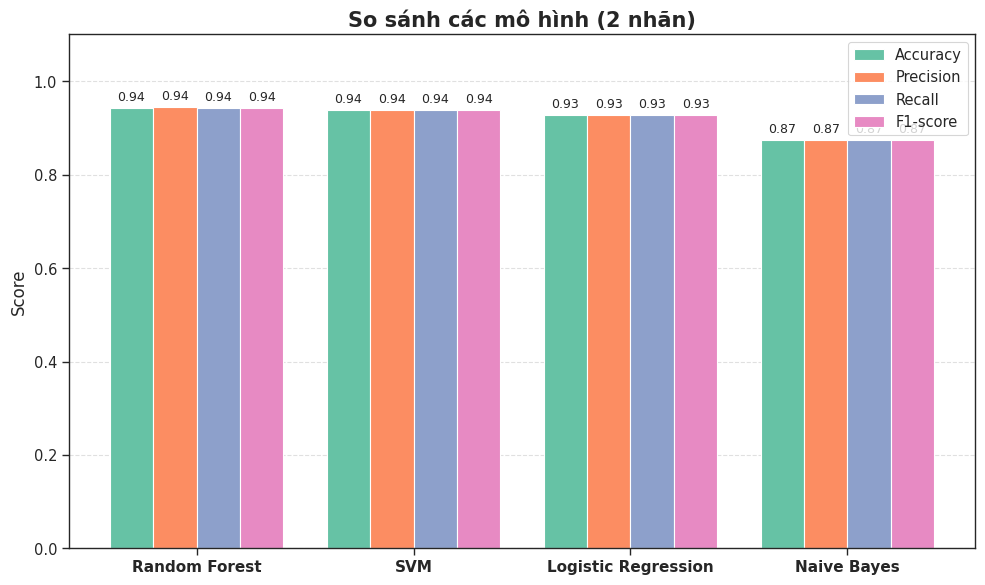

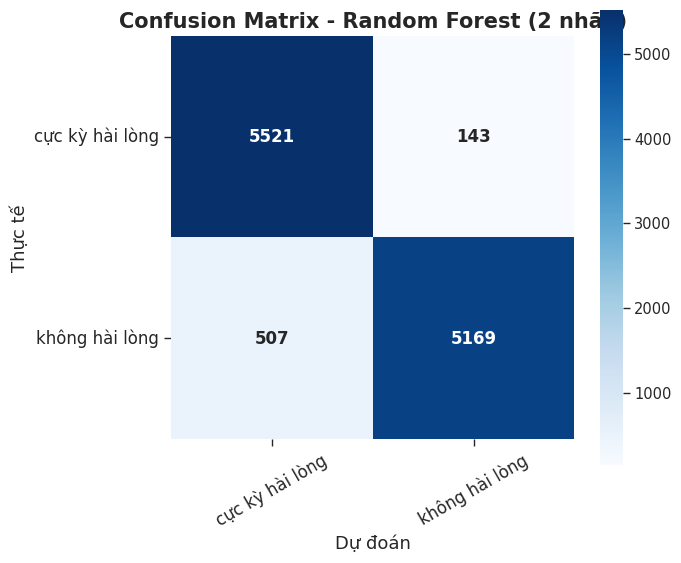

In [755]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# ======================
# Hu·∫•n luy·ªán & ƒë√°nh gi√° 2 nh√£n
# ======================

# Naive Bayes
result_nb_2 = train_and_evaluate_model(
    MultinomialNB(),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="Naive Bayes",
    label_type="2 nh√£n"
)

# Random Forest
result_rf_2 = train_and_evaluate_model(
    RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="Random Forest",
    label_type="2 nh√£n"
)

# Logistic Regression
result_lr_2 = train_and_evaluate_model(
    LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="Logistic Regression",
    label_type="2 nh√£n"
)

# SVM
result_svm_2 = train_and_evaluate_model(
    SVC(kernel='linear', probability=True, random_state=42),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="SVM",
    label_type="2 nh√£n"
)

# ======================
# Gom k·∫øt qu·∫£ v√† tr·ª±c quan h√≥a
# ======================
ket_qua_2_nhan = {
    "Naive Bayes": result_nb_2,
    "Random Forest": result_rf_2,
    "Logistic Regression": result_lr_2,
    "SVM": result_svm_2
}

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh v√† ma tr·∫≠n nh·∫ßm l·∫´n
def_truc_quan_mo_rong(ket_qua_2_nhan, label_type="2 nh√£n", Y_test=Y_test_2_label)


In [757]:
import re

# --- H√†m ki·ªÉm tra t·ª´ b·ªã c·∫•m ---
def get_violations(comment, bad_words):
    comment_lower = comment.lower()
    violations = []
    for word in bad_words:
        if re.search(rf"\b{re.escape(word)}\b", comment_lower):
            violations.append(word)
    return violations

# --- H√†m d·ª± ƒëo√°n cu·ªëi c√πng ---
def process_comment_2_label(comment, model, vectorizer, bad_words):
    # 1. Ki·ªÉm tra t·ª´ b·ªã c·∫•m
    violations = get_violations(comment, bad_words)
    if violations:
        return f"‚ùå B√¨nh lu·∫≠n ch·ª©a t·ª´ c·∫•m: {', '.join(violations)}"

    # 2. Ki·ªÉm tra ƒë·∫ßu v√†o r·ªóng
    if not comment.strip():
        return "‚ö†Ô∏è B√¨nh lu·∫≠n tr·ªëng!"

    # 3. Vector h√≥a v√† d·ª± ƒëo√°n
    X = vectorizer.transform([comment])
    prediction = model.predict(X)[0]
    return f"‚úÖ D·ª± ƒëo√°n: {prediction}"

# --- Danh s√°ch test ---
test_comments = [
    "S·∫£n ph·∫©m n√†y r·∫•t tuy·ªát v·ªùi, t√¥i c·ª±c k·ª≥ h√†i l√≤ng!",  # khen
    "Ch·∫•t l∆∞·ª£ng qu√° t·ªá, kh√¥ng ƒë√°ng ti·ªÅn.",              # ch√™
    "C≈©ng b√¨nh th∆∞·ªùng th√¥i, kh√¥ng c√≥ g√¨ ƒë·∫∑c bi·ªát.",     # trung l·∫≠p
    "ƒê·ªì n√†y ngu v√£i, kh√¥ng bao gi·ªù mua l·∫°i n·ªØa.",       # c√≥ t·ª´ c·∫•m
    "s·∫£n ph·∫©m qu√° ƒë·∫Øt so v·ªõi gi√° ti·ªÅn, th·∫≠t th·∫•t v·ªçng",
    "t√¥i s·∫Ω quay l·∫°i ƒë√°nh gi√° sau",
]

# --- Ch·∫°y test tr√™n t·∫•t c·∫£ m√¥ h√¨nh 2 nh√£n ---
def test_all_models_2_label(models_dict, vectorizer, bad_words):
    for model_name, model_info in models_dict.items():
        print(f"\n===== Test v·ªõi m√¥ h√¨nh {model_name} (2 nh√£n) =====")
        for comment in test_comments:
            result = process_comment_2_label(comment, model_info['model'], vectorizer, bad_words)
            print(f"üëâ Input: {comment}\n   Output: {result}")

# --- G·ªçi test ---
test_all_models_2_label(ket_qua_2_nhan, vectorizer_2_tfidf, bad_words)



===== Test v·ªõi m√¥ h√¨nh Naive Bayes (2 nh√£n) =====
üëâ Input: S·∫£n ph·∫©m n√†y r·∫•t tuy·ªát v·ªùi, t√¥i c·ª±c k·ª≥ h√†i l√≤ng!
   Output: ‚úÖ D·ª± ƒëo√°n: c·ª±c k·ª≥ h√†i l√≤ng
üëâ Input: Ch·∫•t l∆∞·ª£ng qu√° t·ªá, kh√¥ng ƒë√°ng ti·ªÅn.
   Output: ‚úÖ D·ª± ƒëo√°n: kh√¥ng h√†i l√≤ng
üëâ Input: C≈©ng b√¨nh th∆∞·ªùng th√¥i, kh√¥ng c√≥ g√¨ ƒë·∫∑c bi·ªát.
   Output: ‚úÖ D·ª± ƒëo√°n: kh√¥ng h√†i l√≤ng
üëâ Input: ƒê·ªì n√†y ngu v√£i, kh√¥ng bao gi·ªù mua l·∫°i n·ªØa.
   Output: ‚ùå B√¨nh lu·∫≠n ch·ª©a t·ª´ c·∫•m: v√£i, ngu
üëâ Input: s·∫£n ph·∫©m qu√° ƒë·∫Øt so v·ªõi gi√° ti·ªÅn, th·∫≠t th·∫•t v·ªçng
   Output: ‚úÖ D·ª± ƒëo√°n: kh√¥ng h√†i l√≤ng
üëâ Input: t√¥i s·∫Ω quay l·∫°i ƒë√°nh gi√° sau
   Output: ‚úÖ D·ª± ƒëo√°n: kh√¥ng h√†i l√≤ng

===== Test v·ªõi m√¥ h√¨nh Random Forest (2 nh√£n) =====
üëâ Input: S·∫£n ph·∫©m n√†y r·∫•t tuy·ªát v·ªùi, t√¥i c·ª±c k·ª≥ h√†i l√≤ng!
   Output: ‚úÖ D·ª± ƒëo√°n: c·ª±c k·ª≥ h√†i l√≤ng
üëâ Input: Ch·∫•t l∆∞·ª£ng qu√° t·ªá, kh√¥ng ƒë√°ng ti·ªÅn

### K·∫øt lu·∫≠n

### L∆∞u m√¥ h√¨nh d·ª± ƒëo√°n ƒë·ªÉ tri·ªÉn khai tr√™n Streamlit


In [759]:
import joblib

# L∆∞u m√¥ h√¨nh Logistic Regression
joblib.dump(result_lr_2['model'], 'lr_model_2label.pkl')


['lr_model_2label.pkl']

In [761]:
joblib.dump(vectorizer_2_tfidf, 'vectorizer_2label.pkl')


['vectorizer_2label.pkl']

In [769]:
joblib.dump(vectorizer_2, 'count_2label.pkl')


['count_2label.pkl']